## Methods and Steps of analyses

We first downloaded and extracted information on worldwide covid-19 cases from the "Ourworld in data" data set kept in a github repository (referenced in Source 1). We combined the global hunger index data and merged the two data sets based on country names. The covid-19 cases and tests data set contained information on the countries, the tests conducted, confirmed cases and deaths per million of population in each country. This data set also contained information on the number of tests per thousand for each country in the database wherever this was available. Not all countries reported the test statistics to the sources from where ourworldindata.org obtained their estimates. We used R for statistical computing for the analyses [@R], and the data and analyses are made available in our github repository in the form of an ipynb file

Following obtaining the data sets and after joining the data sets, we conducted the following statistical data analyses and visualisation

## Sources of data

### Source 1: Data for worldwide covid-19 cases and tests
[Ourworld in data set ](https://github.com/owid/covid-19-data/tree/master/public/data)

### Source 2: Data for global hunger index
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/LU8KRU
Another data set
http://library.ifpri.info/files/2016/09/BK_2016_GHI_appendix_a_w.pdf

### Data repository:  

https://github.com/owid/owid-datasets/tree/master/datasets/Global%20Hunger%20Index-%20IFPRI%20(2018)

### Location of the full data set 

https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Global%20Hunger%20Index-%20IFPRI%20(2018)/Global%20Hunger%20Index-%20IFPRI%20(2018).csv

## Location of the analysis 



In [17]:
## We used R for statistical data analysis
# Within R, we used tidyverse and lubridate libraries for analyses
library(tidyverse)
library(lubridate)

In [18]:
# First obtain the data
ourdata <- read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv") # read ourworld data

Parsed with column specification:
cols(
  iso_code = col_character(),
  location = col_character(),
  date = col_date(format = ""),
  total_cases = col_double(),
  new_cases = col_double(),
  total_deaths = col_double(),
  new_deaths = col_double(),
  total_cases_per_million = col_double(),
  new_cases_per_million = col_double(),
  total_deaths_per_million = col_double(),
  new_deaths_per_million = col_double(),
  total_tests = col_double(),
  new_tests = col_double(),
  total_tests_per_thousand = col_double(),
  new_tests_per_thousand = col_double(),
  tests_units = col_character()
)


In [19]:
# Second, get the latest data out of it
latest_covid_data <- ourdata %>%
 filter(date == max(date)) # get the latest data as of 24th April from ourworldindata.com

In [20]:
# Obtain the latest data for 2018 for global hunger index

global_hunger_index_data <- read_csv("https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Global%20Hunger%20Index-%20IFPRI%20(2018)/Global%20Hunger%20Index-%20IFPRI%20(2018).csv")

Parsed with column specification:
cols(
  Entity = col_character(),
  Year = col_double(),
  `Global Hunger Index (IFPRI (2016))` = col_double(),
  `Global Hunger Index Rank (IFPRI, 2018)` = col_double()
)


In [21]:
# prepare the data from global hunger index and select only 2018 data, and remove missing values
ghi_data_2018 <- global_hunger_index_data %>%
 rename(ghi_2016 = `Global Hunger Index (IFPRI (2016))`,
       ghi_2018 = `Global Hunger Index Rank (IFPRI, 2018)`,
       location = Entity) %>%
 select(location, ghi_2018) %>%
 drop_na()

ghi_data_2018 %>% head() # examine the first six rows of the ghi data
latest_covid_data %>% head() # examine the first six rows of the covid data with latest date

location,ghi_2018
<chr>,<dbl>
Afghanistan,111
Albania,53
Algeria,39
Angola,95
Argentina,18
Armenia,25


iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ABW,Aruba,2020-04-24,100,0,2,0,936.628,0.000,18.733,0.000,NA,NA,NA,NA,NA
AFG,Afghanistan,2020-04-24,1281,105,42,2,32.907,2.697,1.079,0.051,NA,NA,NA,NA,NA
AGO,Angola,2020-04-24,25,1,2,0,0.761,0.030,0.061,0.000,NA,NA,NA,NA,NA
AIA,Anguilla,2020-04-24,3,0,0,0,199.973,0.000,0.000,0.000,NA,NA,NA,NA,NA
ALB,Albania,2020-04-24,663,29,27,0,230.384,10.077,9.382,0.000,NA,NA,NA,NA,NA
AND,Andorra,2020-04-24,724,1,37,0,9370.349,12.942,478.871,0.000,NA,NA,NA,NA,NA


In [22]:
# Merge latest covid data with the ghi data by location

covid_ghi <- latest_covid_data %>%
  inner_join(ghi_data_2018, by = "location" )

In [23]:
# clean this data set to keep total_cases, total_deaths, total_cases_per_million
# total_deaths_per_million
# total_tests_per_thousand,
# ghi_2018

covid_ghi_rev <- covid_ghi %>% 
  select(location, total_cases, total_deaths, total_cases_per_million, total_deaths_per_million, 
        total_tests_per_thousand, ghi_2018)

# covid_ghi_rev %>%
# head() # gives us the combined data set

# create a new variable case fatality ratio from total_deaths / total_cases

covid_ghi_rev1 <- covid_ghi_rev %>%
  mutate(cfr = total_deaths / total_cases)

covid_ghi_rev1 %>%
 head() # first six rows of the combined data set

location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,ghi_2018,cfr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1281,42,32.907,1.079,NA,111,0.03278689
Angola,25,2,0.761,0.061,NA,95,0.08000000
Albania,663,27,230.384,9.382,NA,53,0.04072398
Argentina,3423,165,75.737,3.651,0.981,18,0.04820333
Armenia,1596,27,538.601,9.112,NA,25,0.01691729
Azerbaijan,1548,20,152.675,1.973,NA,40,0.01291990


Saving 6.67 x 6.67 in image


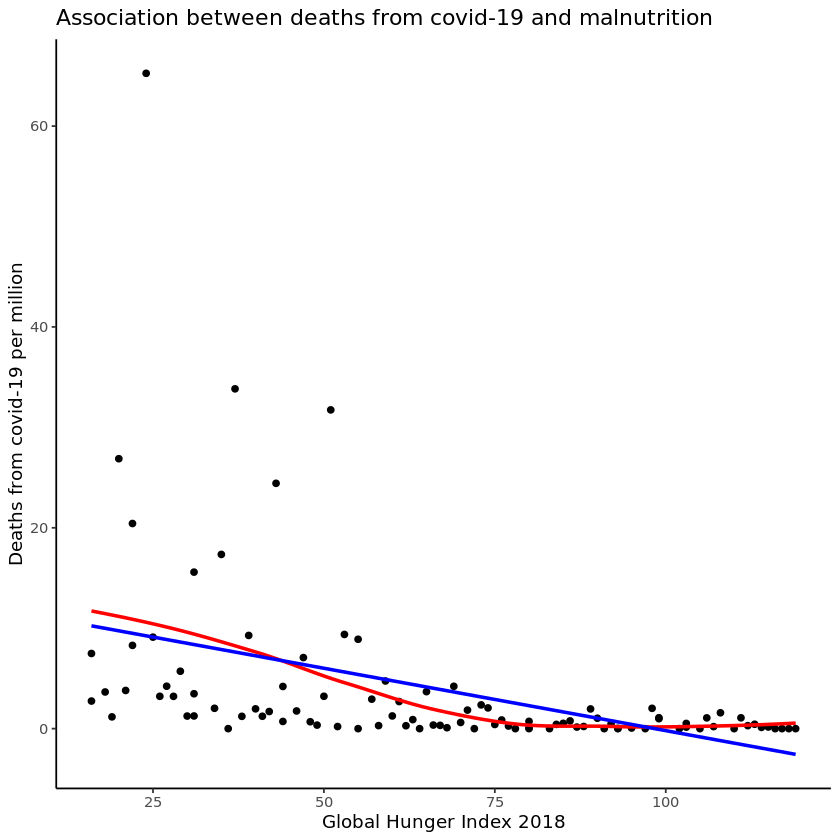

In [24]:
# Scatterplot of cases rate against ghi_2018
# We have added a smoothing parameter

covid_ghi_rev1 %>%
  ggplot(aes(x = ghi_2018, y = total_deaths_per_million)) +
  geom_point() +
  geom_smooth(method = "loess", se = F, colour = "red") +
  geom_smooth(method = "lm", se = F, colour = "blue") +
  ggtitle("Association between deaths from covid-19 and malnutrition") +
  ylab("Deaths from covid-19 per million") +
  xlab("Global Hunger Index 2018") +
  theme_classic() +
  ggsave("death_ghi_1.jpg")

Saving 6.67 x 6.67 in image


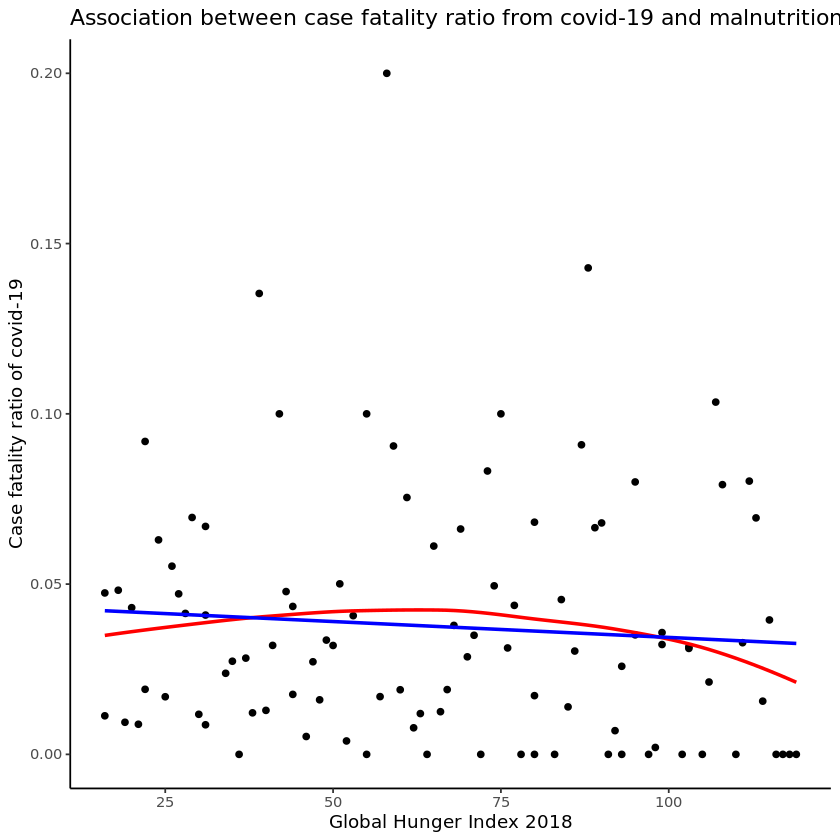

In [25]:
# Scatterplot of case fatality ratio against ghi_2018
# We have added smoothing parameters and linear regression line

covid_ghi_rev1 %>%
  ggplot(aes(x = ghi_2018, y = cfr)) +
  geom_point() +
  geom_smooth(method = "loess", se = F, colour = "red") +
  geom_smooth(method = "lm", se = F, colour = "blue") +
  ggtitle("Association between case fatality ratio from covid-19 and malnutrition") +
  ylab("Case fatality ratio of covid-19") +
  xlab("Global Hunger Index 2018") +
  theme_classic() +
  ggsave("cfr_ghi1.jpg")

Saving 6.67 x 6.67 in image


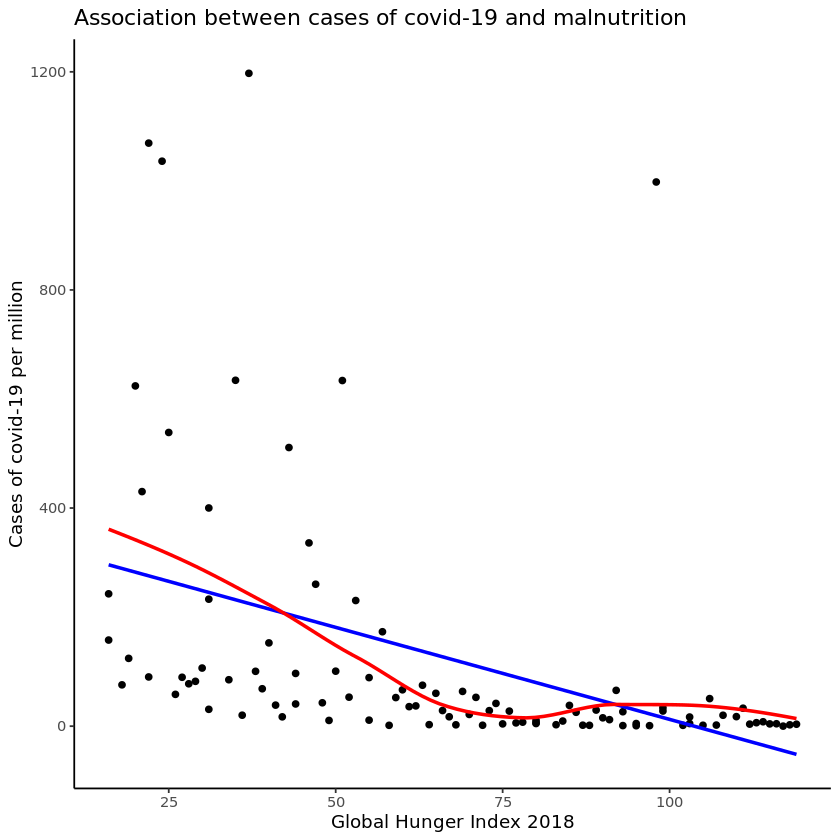

In [26]:
covid_ghi_rev1 %>%
  ggplot(aes(x = ghi_2018, y = total_cases_per_million)) +
  geom_point() +
  geom_smooth(method = "lm", se = F, colour = "blue") +
  geom_smooth(method = "loess", se = F, colour = "red") +
  ggtitle("Association between cases of covid-19 and malnutrition") +
  ylab("Cases of covid-19 per million") +
  xlab("Global Hunger Index 2018") +
  theme_classic() +
  ggsave("case_ghi.jpg")

In [27]:
## We have created quintiles or 20th percentiles of both global hunger index and tests per thousand

covid_ghi_rev2 <- covid_ghi_rev1 %>%
 mutate(quint_ghi = as.factor(ntile(ghi_2018, 5)),
       tests_quintile = as.factor(ntile(total_tests_per_thousand, 5))) # create a new variable for quintiles of 

Saving 6.67 x 6.67 in image


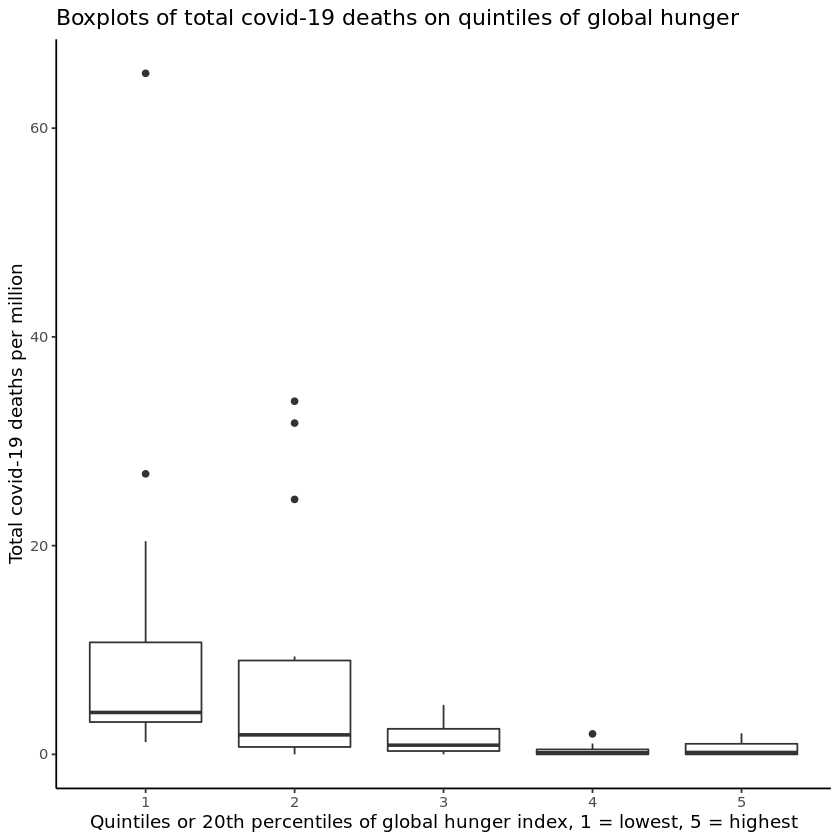

In [28]:
# Boxplot of total deaths per million with quintiles of global hunger index
covid_ghi_rev2 %>%
 ggplot(aes(x = quint_ghi, y = total_deaths_per_million)) +
 geom_boxplot() +
 ggtitle("Boxplots of total covid-19 deaths on quintiles of global hunger") +
 xlab("Quintiles or 20th percentiles of global hunger index, 1 = lowest, 5 = highest") +
 ylab("Total covid-19 deaths per million") +
 theme_classic() +
 ggsave("boxplot_death_ghi.jpg")

In [29]:
# remove missing values from the covid_ghi_rev2
# this way, keep only those countries for which testing data, covid-19 data, and global hunger index data
# are available

covid_ghi_complete <- covid_ghi_rev2 %>%
  drop_na(total_tests_per_thousand)
# view the header of the covid_ghi_complete
library(knitr)
table_with_complete_tests <- covid_ghi_complete %>%
 arrange(desc(total_deaths_per_million, total_testss_per_thousand)) %>%
 select(location, total_deaths_per_million, total_tests_per_thousand, ghi_2018) 

print_table <- table_with_complete_tests %>%
  kable()

print_table



|location  | total_deaths_per_million| total_tests_per_thousand| ghi_2018|
|:---------|------------------------:|------------------------:|--------:|
|Serbia    |                   20.427|                    6.306|       22|
|Russia    |                    3.803|                   17.748|       21|
|Argentina |                    3.651|                    0.981|       18|
|Malaysia  |                    2.935|                    3.703|       57|
|Slovakia  |                    2.747|                   11.238|       16|
|Indonesia |                    2.365|                    0.186|       73|
|Pakistan  |                    1.073|                    0.630|      106|
|India     |                    0.520|                    0.392|      103|
|Ethiopia  |                    0.026|                    0.103|       93|

Table 1. List of countries with complete data on testing statistics, deaths per million from covid-19, and tests

|location  | total_deaths_per_million| total_tests_per_thousand| ghi_2018|
|:---------|------------------------:|------------------------:|--------:|
|Serbia    |                   20.427|                    6.306|       22|
|Russia    |                    3.803|                   17.748|       21|
|Argentina |                    3.651|                    0.981|       18|
|Malaysia  |                    2.935|                    3.703|       57|
|Slovakia  |                    2.747|                   11.238|       16|
|Indonesia |                    2.365|                    0.186|       73|
|Pakistan  |                    1.073|                    0.630|      106|
|India     |                    0.520|                    0.392|      103|
|Ethiopia  |                    0.026|                    0.103|       93|

Saving 6.67 x 6.67 in image


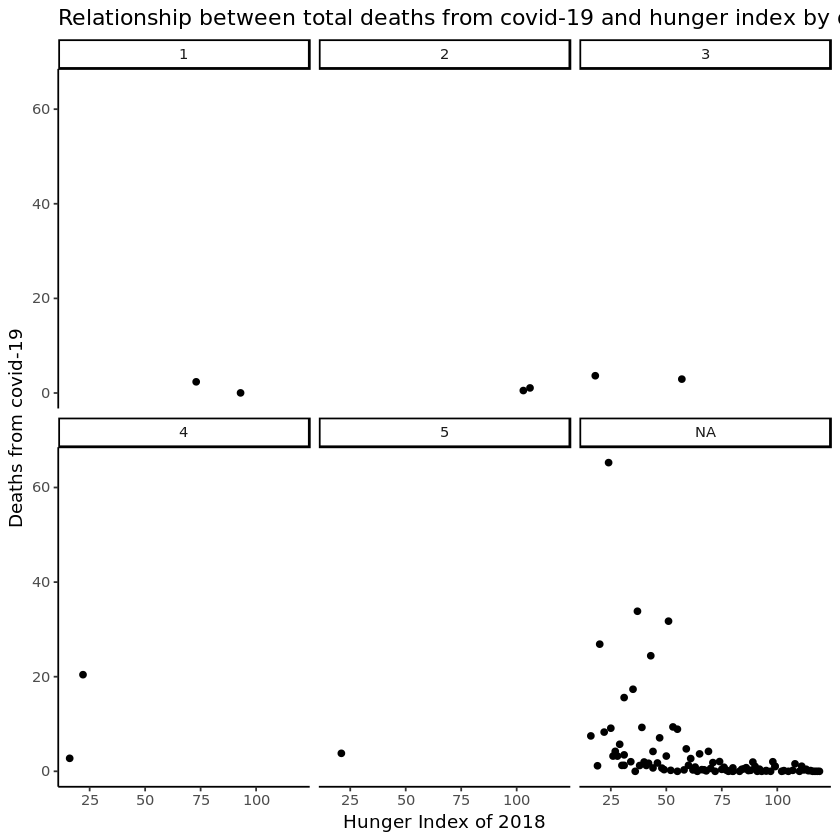

In [30]:
# what is the relationship between total deaths per million and ghi 2018 grouped by testing 
# we will first try using a linear model with a smooth function of linear modelling
# then we will try to plot box plots staggered over testing quintiles

covid_ghi_rev2 %>%
 ggplot(aes(x = ghi_2018, y = total_deaths_per_million)) +
 geom_point() +
 facet_wrap(~tests_quintile) +
 ggtitle("Relationship between total deaths from covid-19 and hunger index by quintile of tests") +
 xlab("Hunger Index of 2018") +
 ylab("Deaths from covid-19") +
 theme_classic() +
 ggsave("tests.jpg")
 

In [50]:
# Create a binary variable
covid_reg_data <- covid_ghi_rev2 %>%
  mutate(high_deaths = (total_deaths_per_million >  median(total_deaths_per_million, na.rm = T))) # done to create a new binary variable

# Compare mean deaths per million and cfr across quintiles of global hunger index

ghi_dpm <- covid_reg_data %>%
 group_by(quint_ghi) %>%
 summarise(mean_dpm = mean(total_deaths_per_million, na.rm = T),
          mean_cfr = mean(cfr, na.rm = T))

# find out the p-values

aov_d_q <- aov(total_deaths_per_million ~ quint_ghi, data = covid_reg_data)
aov_cfr_q <- aov(cfr ~ quint_ghi, data = covid_reg_data)
ghi_dpm
summary(aov_d_q)
summary(aov_cfr_q)

# Average ghi values for high and low death rate countries

ghi_deaths <- covid_reg_data %>%
 group_by(high_deaths) %>%
 summarise(mean_ghi = mean(ghi_2018, na.rm = T))

aov_ghi_dpm <- aov(ghi_2018 ~ high_deaths, data = covid_reg_data)
aov_ghi_dpm_p <- summary(aov_ghi_dpm)

ghi_deaths
aov_ghi_dpm_p

## All of the above measures tell us that either for high and low death rates the ghis are 
# statistically significantly different OR
# death rates significantly vary across the quintiles of ghi, with high death rates in 
# low ghis, and low death rates in high ghis

# Now we run 

quint_ghi,mean_dpm,mean_cfr
<fct>,<dbl>,<dbl>
1,10.30745,0.03759957
2,7.09655,0.03691567
3,1.49875,0.04730222
4,0.34375,0.03675537
5,0.48650,0.02871234


            Df Sum Sq Mean Sq F value   Pr(>F)    
quint_ghi    4   1627   406.6   6.138 0.000195 ***
Residuals   95   6293    66.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df  Sum Sq  Mean Sq F value Pr(>F)
quint_ghi    4 0.00348 0.000871   0.652  0.627
Residuals   95 0.12698 0.001337               

high_deaths,mean_ghi
<lgl>,<dbl>
FALSE,84.84
TRUE,48.42


            Df Sum Sq Mean Sq F value   Pr(>F)    
high_deaths  1  33160   33160   56.53 2.66e-11 ***
Residuals   98  57487     587                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [61]:
## We now conduct binomial logistic regression where
# we regress high likelihood of deaths on 2018 ghi

log_reg <- glm(high_deaths ~ ghi_2018, family = binomial(link="logit"), data = covid_reg_data)
sum_log_reg <- summary(log_reg)
sum_log_reg

exp(-0.054)




Call:
glm(formula = high_deaths ~ ghi_2018, family = binomial(link = "logit"), 
    data = covid_reg_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.91266  -0.77672   0.00908   0.67315   2.23567  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.60651    0.74064   4.869 1.12e-06 ***
ghi_2018    -0.05423    0.01050  -5.167 2.37e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.629  on 99  degrees of freedom
Residual deviance:  96.658  on 98  degrees of freedom
AIC: 100.66

Number of Fisher Scoring iterations: 4


[1] 0.9474321